## Introduction to Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn is built on top of matplotlib (a widely used plotting library) and closely integrated with pandas data structures.
<br/>
<center>
<img src="imgs/iris.png" width="600">
</center>
<br/>

In this exercise we will use seaborn to visualize data from the famous **Iris dataset**. This simple dataset contains the measurements of 150 iris flowers of three different species: Iris setosa, Iris versicolor, and Iris virginica. Each flower has four features: sepal length, sepal width, petal length, and petal width.

The figure above shows the three different species of iris flowers and explains what the sepal and petal are.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Not necessary, but can be useful for customizing seaborn plots

iris = pd.read_csv('data/iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,Setosa
2,3,4.7,3.2,1.3,0.2,Setosa
3,4,4.6,3.1,1.5,0.2,Setosa
4,5,5.0,3.6,1.4,0.2,Setosa


In [2]:
# Let's see how many iris flowers of each species are in the dataset (should be 50 of each).

varieties = iris['Species'].value_counts() 
# This will return a pandas Series with the counts of each unique value in the 'Species' column
print(varieties)

Species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

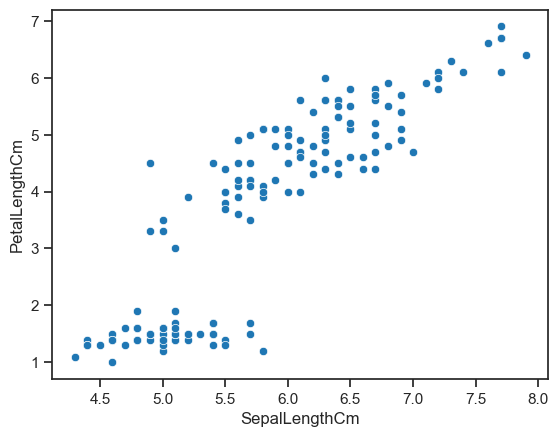

In [9]:
# As our first plot, let's visualize the relationship between sepal length and petal length for each iris.

# We can use a scatter plot for this and color the points based on the 'Species' column - it can be done 
# by passing hue='Species' parameter to the scatterplot function.

sns.set_style('ticks') # Try 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
sns.set_context('notebook') # Try 'paper', 'poster', 'notebook' and see how it changes the looks

sns.scatterplot(data=iris, x='SepalLengthCm', y='PetalLengthCm')

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

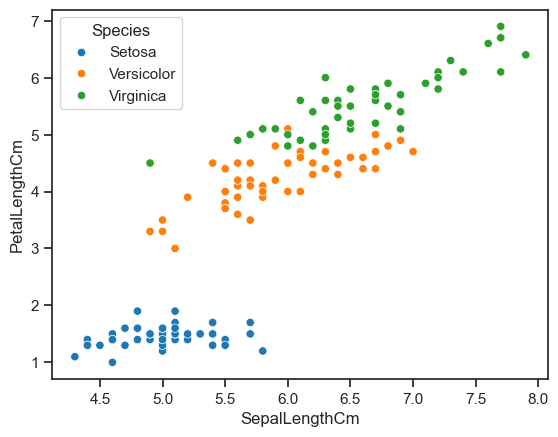

In [10]:
# We can color the points based on the 'Species' column by passing hue='Species' parameter to the scatterplot function.

sns.scatterplot(data=iris, x='SepalLengthCm', y='PetalLengthCm', hue='Species')

<Axes: xlabel='Sepal Length (cm)', ylabel='Petal Length (cm)'>

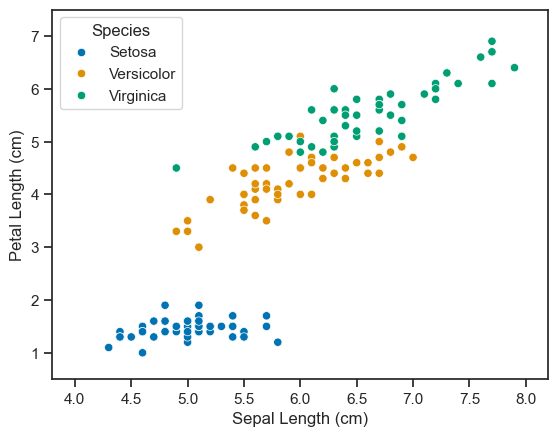

In [13]:
# We can make the plot look even better by adding custom labels and choosing a custom color palette.

# Let's add labels to the x and y axes
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

# Now let's change the axis limits
plt.xlim(3.8, 8.2)
plt.ylim(0.5, 7.5)

# The palette parameter allows you to choose a color palette for the plot.
sns.scatterplot(data=iris, x='SepalLengthCm', y='PetalLengthCm', hue='Species', palette='colorblind')

Text(0.5, 0, 'Sepal Width (cm)')

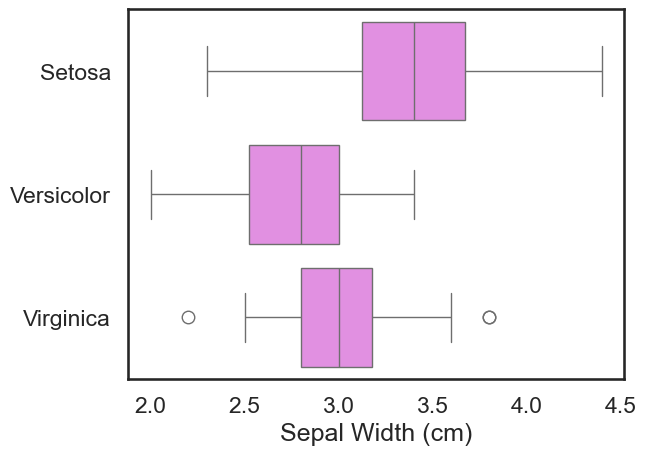

In [14]:
# A boxplot is a standardized way of displaying the distribution of data based on a five-number summary: 
# minimum, first quartile, median, third quartile, and maximum. Let's plot the petal width values 
# using a boxplot.

sns.set_style('white')
sns.set_context('talk')

boxplot = sns.boxplot(data=iris, x='SepalWidthCm', y='Species', color='violet')

plt.ylabel('') # Remove the y-axis label (Species) just to make the plot look cleaner
plt.xlabel('Sepal Width (cm)') # Add the x-axis label

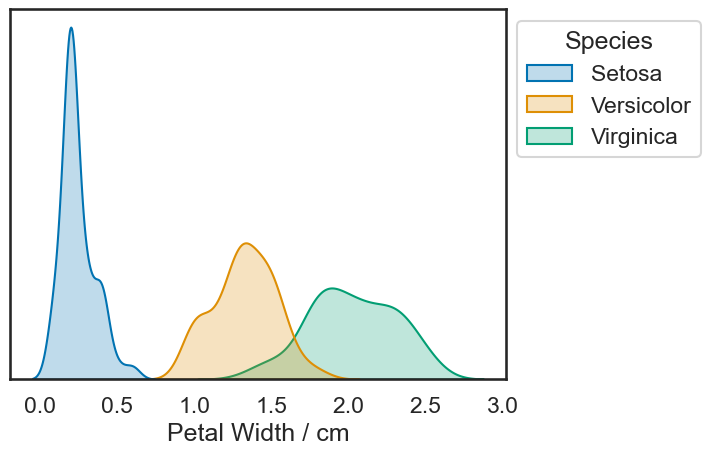

In [16]:
# Let's plot a distribution of the 'PetalWidthCm' values. We can use a kernel density estimate (KDE) plot 
# for this. A KDE plot is a non-parametric way to estimate the probability density function of a random 
# variable. It's like a smoothed version of a histogram!

sns.set_style('white')
sns.set_context('talk')

kdeplot = sns.kdeplot(iris, x='PetalWidthCm', hue='Species', fill=True, palette='colorblind')

# By passing hue='Species' parameter to the kdeplot function, we color the plot based on the 'Variety' 
# column. The fill=True parameter fills the area under the curve with color.

plt.xlabel('Petal Width / cm') # Add the x-axis label
plt.ylabel('') # Add the y-axis label
plt.yticks([]) # Remove the y-axis ticks

sns.move_legend(kdeplot, "upper left", bbox_to_anchor=(1, 1)) # Move the legend outside the plot

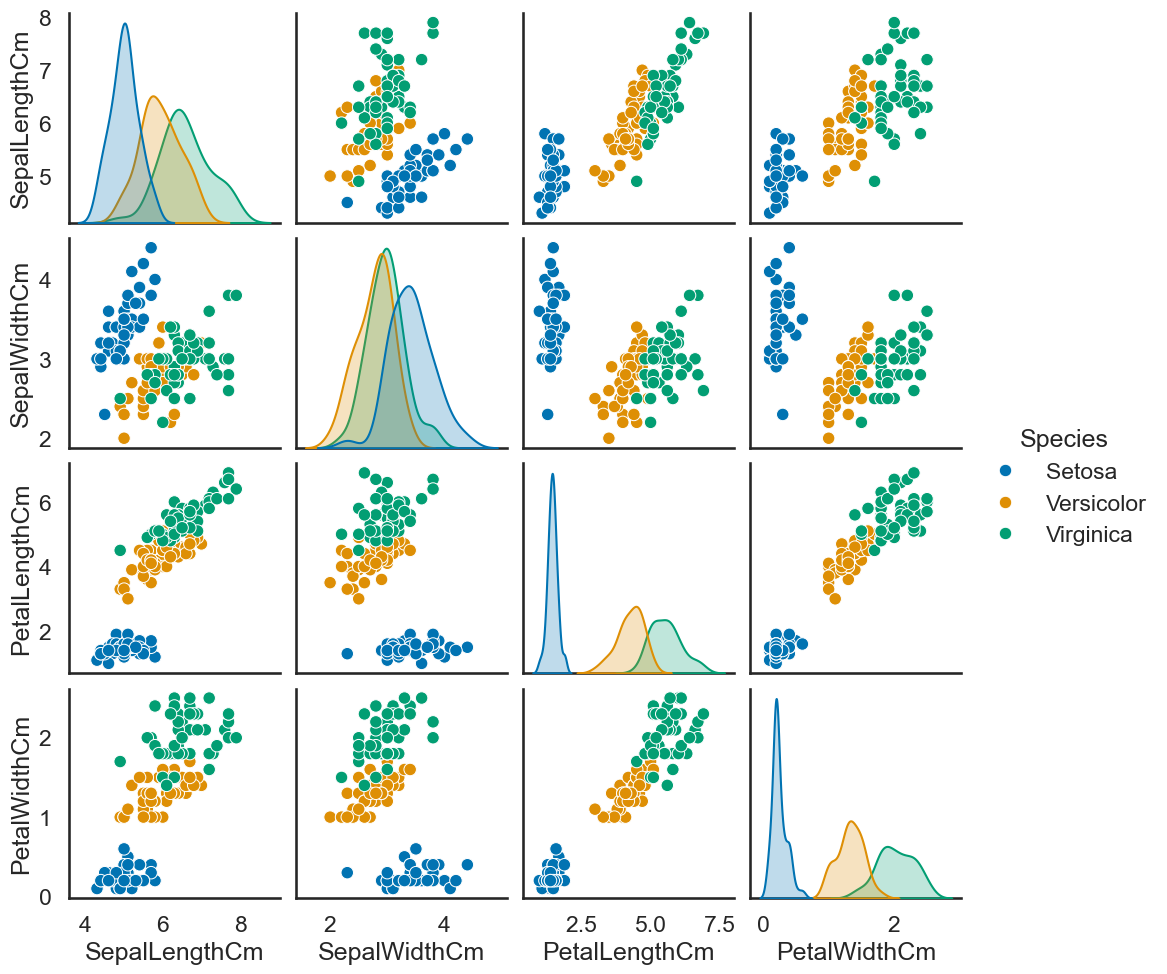

In [17]:
# A pairplot is a great way to explore and visualize relationships between variables in a dataset. 
# It creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. 
# Let's create a pairplot for the iris dataset, coloring the points based on the 'Species' column.

# We select the columns we are interested in seeing
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
iris_selected = iris[columns] # This will return a DataFrame with only the selected columns

pairplot = sns.pairplot(iris_selected, hue='Species', palette='colorblind')